In [ ]:
from imblearn.over_sampling import SMOTE
print("SMOTE imported successfully!")


SMOTE imported successfully!


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Dark theme
plt.style.use("dark_background")
sns.set_style("darkgrid")


In [1]:
import pandas as pd

# Load datasets
email_df = pd.read_csv('email_table.csv')
opened_df = pd.read_csv('email_opened_table.csv')
clicked_df = pd.read_csv('link_clicked_table.csv')


In [3]:
print("email_df info:")
email_df.info()

email_df info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   email_id             100000 non-null  int64 
 1   email_text           100000 non-null  object
 2   email_version        100000 non-null  object
 3   hour                 100000 non-null  int64 
 4   weekday              100000 non-null  object
 5   user_country         100000 non-null  object
 6   user_past_purchases  100000 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 5.3+ MB


In [4]:
print("opened_df info:")
opened_df.info()

opened_df info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10345 entries, 0 to 10344
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   email_id  10345 non-null  int64
dtypes: int64(1)
memory usage: 80.9 KB


In [5]:
print("clicked_df info:")
clicked_df.info()

clicked_df info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2119 entries, 0 to 2118
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   email_id  2119 non-null   int64
dtypes: int64(1)
memory usage: 16.7 KB


In [6]:

print(email_df.head())
print(opened_df.head())
print(clicked_df.head())


   email_id   email_text email_version  hour    weekday user_country  \
0     85120  short_email  personalized     2     Sunday           US   
1    966622   long_email  personalized    12     Sunday           UK   
2    777221   long_email  personalized    11  Wednesday           US   
3    493711  short_email       generic     6     Monday           UK   
4    106887   long_email       generic    14     Monday           US   

   user_past_purchases  
0                    5  
1                    2  
2                    2  
3                    1  
4                    6  
   email_id
0    284534
1    609056
2    220820
3    905936
4    164034
   email_id
0    609056
1    870980
2    935124
3    158501
4    177561


In [7]:

print("email_df shape:", email_df.shape)
print("opened_df shape:", opened_df.shape)
print("clicked_df shape:", clicked_df.shape)


email_df shape: (100000, 7)
opened_df shape: (10345, 1)
clicked_df shape: (2119, 1)


# check for missing values

In [8]:
print("Missing values in email_df:\n", email_df.isnull().sum())
print("Missing values in opened_df:\n", opened_df.isnull().sum())
print("Missing values in clicked_df:\n", clicked_df.isnull().sum())


Missing values in email_df:
 email_id               0
email_text             0
email_version          0
hour                   0
weekday                0
user_country           0
user_past_purchases    0
dtype: int64
Missing values in opened_df:
 email_id    0
dtype: int64
Missing values in clicked_df:
 email_id    0
dtype: int64


# Understand Distribution of Categorical Variables

In [9]:
print("Email text types:\n", email_df['email_text'].value_counts())
print("\nEmail version types:\n", email_df['email_version'].value_counts())
print("\nWeekday distribution:\n", email_df['weekday'].value_counts())
print("\nUser country distribution (top 10):\n", email_df['user_country'].value_counts().head(10))


Email text types:
 email_text
long_email     50276
short_email    49724
Name: count, dtype: int64

Email version types:
 email_version
generic         50209
personalized    49791
Name: count, dtype: int64

Weekday distribution:
 weekday
Saturday     14569
Sunday       14387
Monday       14363
Thursday     14277
Friday       14177
Tuesday      14143
Wednesday    14084
Name: count, dtype: int64

User country distribution (top 10):
 user_country
US    60099
UK    19939
FR     9995
ES     9967
Name: count, dtype: int64


# **LETS GO THROGH SOME BASIC EDA....**

# Email Text Type

<ipython-input-10-2eded5231728>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='email_text', data=email_df, palette='rocket')


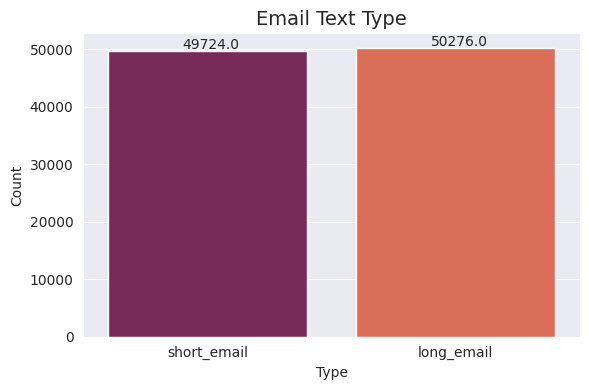

In [10]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='email_text', data=email_df, palette='rocket')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + 0.3, p.get_height() + 300))

plt.title("Email Text Type", fontsize=14)
plt.xlabel("Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


There is a fairly even distribution between the number of short emails and long emails in the dataset.
Long emails slightly outnumber short emails, with approximately 50,276 long emails compared to roughly 49,724 short emails.

# Email Version Distribution

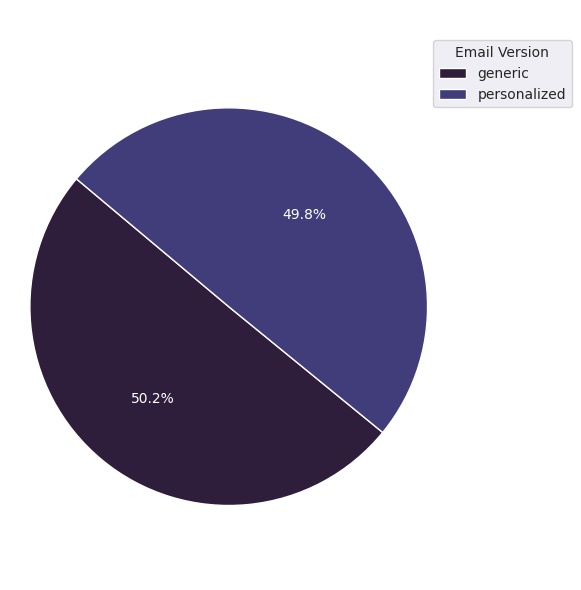

In [11]:
version_counts = email_df['email_version'].value_counts()
labels = version_counts.index
sizes = version_counts.values

plt.figure(figsize=(6, 6))
patches, texts, autotexts = plt.pie(
    sizes,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette("mako"),
    textprops={'color': 'white'}
)

for text in texts:
    text.set_text("")

plt.legend(patches, labels, title="Email Version", loc="upper right", bbox_to_anchor=(1.3, 1))

plt.title("Email Version Distribution", fontsize=14, color='white')
plt.axis('equal')  # Equal aspect ratio
plt.tight_layout()
plt.show()


The dataset contains a near split between generic and personalized emails.
Generic emails make up a slightly larger portion of the data at 50.2%, while personalized emails account for 49.8%.








# Emails Sent by Weekday

<ipython-input-12-53e0c07de7e9>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=weekday_counts.index, x=weekday_counts.values, palette='flare')


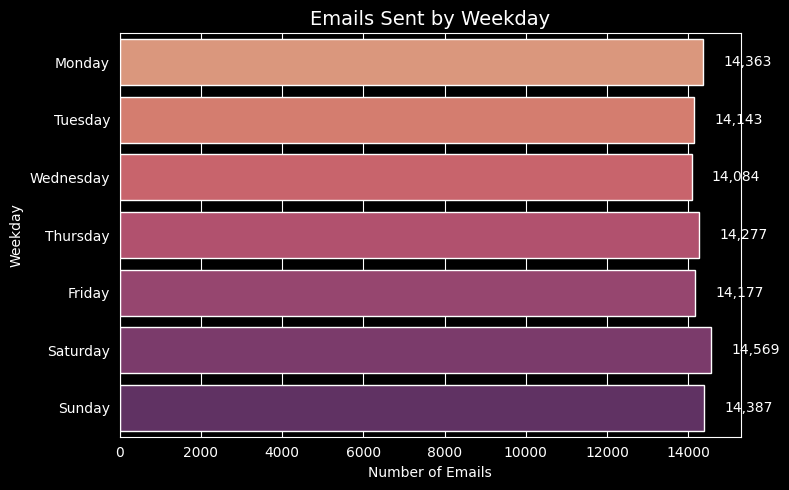

In [12]:
plt.style.use('dark_background')  # Dark theme

plt.figure(figsize=(8, 5))

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts = email_df['weekday'].value_counts().reindex(weekday_order)

ax = sns.barplot(y=weekday_counts.index, x=weekday_counts.values, palette='flare')

for i, v in enumerate(weekday_counts.values):
    ax.text(v + 500, i, f'{v:,}', color='white', va='center', fontsize=10)


plt.title("Emails Sent by Weekday", fontsize=14, color='white')
plt.xlabel("Number of Emails", color='white')
plt.ylabel("Weekday", color='white')

ax.tick_params(colors='white')
plt.tight_layout()
plt.show()


The number of emails sent is relatively consistent across all days of the week.
Saturday sees the highest volume of emails sent, with 14,569, while Wednesday has the lowest, with 14,084.

# Top 4 User Countries

<ipython-input-13-ffc2ee517531>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_countries.index, y=top_countries.values, palette='icefire')


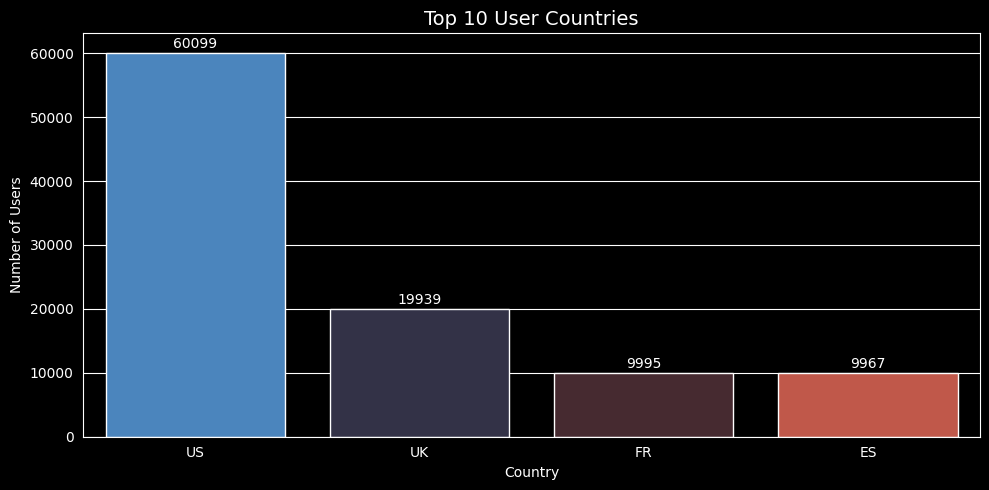

In [13]:
top_countries = email_df['user_country'].value_counts().head(10)

plt.style.use('dark_background')

plt.figure(figsize=(10, 5))
ax = sns.barplot(x=top_countries.index, y=top_countries.values, palette='icefire')


for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2., height + 300),
                ha='center', va='bottom', color='white', fontsize=10)

plt.title("Top 4 User Countries", fontsize=14, color='white')
plt.xlabel("Country", color='white')
plt.ylabel("Number of Users", color='white')

# Styling
ax.tick_params(colors='white')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


The United States has a significantly larger user base compared to the other countries shown.
The UK has the second-highest number of users, followed by France and then Spain, with progressively smaller user counts.

# Distribution of User Past Purchases

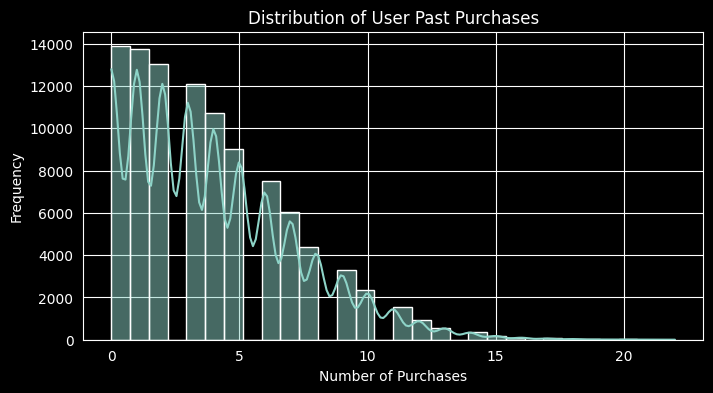

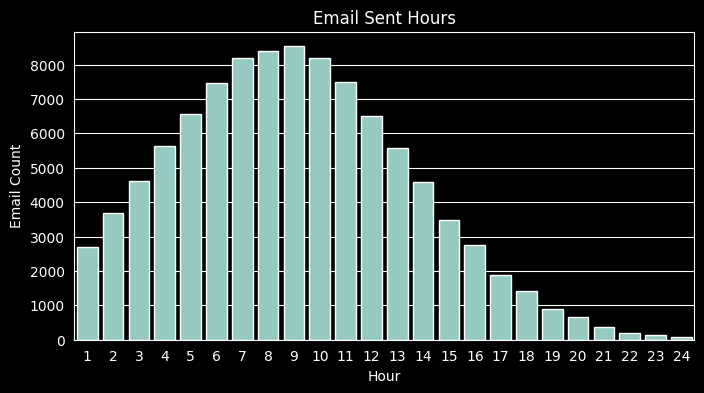

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8, 4))
sns.histplot(email_df['user_past_purchases'], bins=30, kde=True)
plt.title("Distribution of User Past Purchases")
plt.xlabel("Number of Purchases")
plt.ylabel("Frequency")
plt.show()


plt.figure(figsize=(8, 4))
sns.countplot(x='hour', data=email_df)
plt.title("Email Sent Hours")
plt.xlabel("Hour")
plt.ylabel("Email Count")
plt.show()




**Distribution of User Past Purchases**

1.  The majority of users have made a relatively small number of past purchases, with the highest frequency around 1 or 2 purchases.
2.  As the number of past purchases increases, the frequency of users decreases significantly, indicating a long-tailed distribution.

**Email Sent Hours**

3.  Email sending activity peaks during typical daytime working hours, with the highest volume of emails sent around 9, 10, and 11 AM.
4.  There is a noticeable drop in email sending during the late evening and early morning hours, suggesting a focus on business hours for email campaigns.

# What percentage of users opened the email and what percentage clicked on the link?

In [15]:
email_df['opened'] = email_df['email_id'].isin(opened_df['email_id']).astype(int)
email_df['clicked'] = email_df['email_id'].isin(clicked_df['email_id']).astype(int)


In [16]:

total_emails = len(email_df)
opened = email_df['opened'].sum()
clicked = email_df['clicked'].sum()

print(f"Open Rate: {opened / total_emails * 100:.2f}%")
print(f"Click-Through Rate: {clicked / total_emails * 100:.2f}%")


Open Rate: 10.35%
Click-Through Rate: 2.12%


### The open rate of the email campaign is 10.35%, indicating that only about 1 in 10 users opened the email.
### The click-through rate is 2.12%, meaning that only a small fraction of total recipients actually clicked the link inside.
### This shows there is significant room for improvement in both engagement (opens) and conversions (clicks), which a targeted strategy or model could potentially enhance.


# **Segment-Wise Open and Click Rate Analysis**

I segmented the open and click-through rates based on various factors — email version, email text, weekday, and country — to uncover patterns in user behavior.
This helps identify which combinations perform better, offering actionable insights for improving future campaigns.
Segment-wise breakdown is essential for targeted marketing and model-building.

In [17]:
# By email version
print(email_df.groupby('email_version')[['opened', 'clicked']].mean() * 100)

# By email text
print(email_df.groupby('email_text')[['opened', 'clicked']].mean() * 100)

# By weekday
print(email_df.groupby('weekday')[['opened', 'clicked']].mean() * 100)

# By country (top 5 only)
top_countries = email_df['user_country'].value_counts().head(5).index
print(email_df[email_df['user_country'].isin(top_countries)]
      .groupby('user_country')[['opened', 'clicked']].mean() * 100)


                  opened   clicked
email_version                     
generic         7.934832  1.513673
personalized   12.775401  2.729409
                opened   clicked
email_text                      
long_email    9.117670  1.853767
short_email  11.585954  2.387177
              opened   clicked
weekday                       
Friday      7.413416  1.403682
Monday     11.606210  2.290608
Saturday    8.765186  1.784611
Sunday      8.764857  1.675123
Thursday   11.844225  2.444491
Tuesday    12.048363  2.488864
Wednesday  12.027833  2.761999
                 opened   clicked
user_country                     
ES             3.912913  0.832748
FR             4.062031  0.800400
UK            12.016651  2.467526
US            11.902028  2.435981


**Personalized emails** have much higher open (12.78%) and click (2.73%) rates than generic ones — personalization clearly improves engagement.

**Short emails** perform better than long ones, suggesting that concise content is more effective in prompting user interaction.

Emails sent on **Tuesday, Wednesday, and Thursday** show the highest open and click rates, indicating **mid-week emails are most effective**.

Among countries, **US and UK users** are far **more responsive** to emails compared to ES and FR, suggesting localization or timing issues for non-English regions.

# Building and Evaluating a Click Prediction Model with Random Forest

I used a Random Forest Classifier to predict whether a user would click on the link in an email using available features like email format, user behavior, and time-based info.
Label encoding was necessary to convert categorical variables into numeric form suitable for machine learning.
The model's performance was evaluated using classification metrics and ROC AUC score to assess how well it distinguishes between clickers and non-clickers.

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import LabelEncoder

# Encode categorical features
encoder = LabelEncoder()
email_df['email_version'] = encoder.fit_transform(email_df['email_version'])
email_df['email_text'] = encoder.fit_transform(email_df['email_text'])
email_df['weekday'] = encoder.fit_transform(email_df['weekday'])
email_df['user_country'] = encoder.fit_transform(email_df['user_country'])

# Features (X) and target (y)
X = email_df[['email_version', 'email_text', 'hour', 'weekday', 'user_country', 'user_past_purchases']]
y = email_df['clicked']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Evaluate model performance
print(classification_report(y_test, y_pred))
print(f"ROC AUC Score: {roc_auc_score(y_test, y_proba):.4f}")


              precision    recall  f1-score   support

           0       0.98      1.00      0.99     19547
           1       0.06      0.01      0.02       453

    accuracy                           0.97     20000
   macro avg       0.52      0.50      0.50     20000
weighted avg       0.96      0.97      0.97     20000

ROC AUC Score: 0.5877


# Estimating Click-Through Rate (CTR) Uplift with Model Predictions


In [19]:

email_df['click_proba'] = model.predict_proba(X)[:, 1]
top_users = email_df.sort_values(by='click_proba', ascending=False).head(int(0.2 * len(email_df)))  # Top 20%
top_users_ctr = top_users['clicked'].mean() * 100
overall_ctr = email_df['clicked'].mean() * 100

print(f"Overall CTR: {overall_ctr:.2f}%")
print(f"Top 20% Predicted Users CTR: {top_users_ctr:.2f}%")
print(f"Estimated CTR Improvement: {top_users_ctr - overall_ctr:.2f}%")


Overall CTR: 2.12%
Top 20% Predicted Users CTR: 9.20%
Estimated CTR Improvement: 7.08%


Overall CTR remains low (2.12%), showing that random emailing is inefficient.

The top 20% users, selected based on the model's confidence, show a higher CTR — indicating the model is effective at identifying high-probability clickers.

The CTR improvement, calculated as the difference, represents the added value the model brings by enabling smarter targeting and potentially boosting engagement.

#  Model Comparison for Click Prediction

In [20]:
from sklearn.metrics import accuracy_score

print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred):.4f}")


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Support Vector Classifier (SVC)': SVC(probability=True, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier()
}


model_results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]


    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    report = classification_report(y_test, y_pred, output_dict=True)

    model_results[name] = {
        'Accuracy': accuracy,
        'ROC AUC': roc_auc,
        'Precision': report['1']['precision'],
        'Recall': report['1']['recall'],
        'F1-Score': report['1']['f1-score']
    }
results_df = pd.DataFrame(model_results).T
print(results_df)


Random Forest Accuracy: 0.9746


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

                                 Accuracy   ROC AUC  Precision    Recall  \
Random Forest                     0.97455  0.587712     0.0625  0.008830   
Logistic Regression               0.97735  0.716944     0.0000  0.000000   
Support Vector Classifier (SVC)   0.97735  0.607036     0.0000  0.000000   
K-Nearest Neighbors               0.97720  0.540260     0.2000  0.002208   

                                 F1-Score  
Random Forest                    0.015474  
Logistic Regression              0.000000  
Support Vector Classifier (SVC)  0.000000  
K-Nearest Neighbors              0.004367  


Logistic Regression shows the best ROC AUC (0.71), indicating it's better at ranking users by click likelihood



# check for class imbalance

In [21]:
# Check the distribution of the target variable (clicked)
print(email_df['clicked'].value_counts())


clicked
0    97881
1     2119
Name: count, dtype: int64


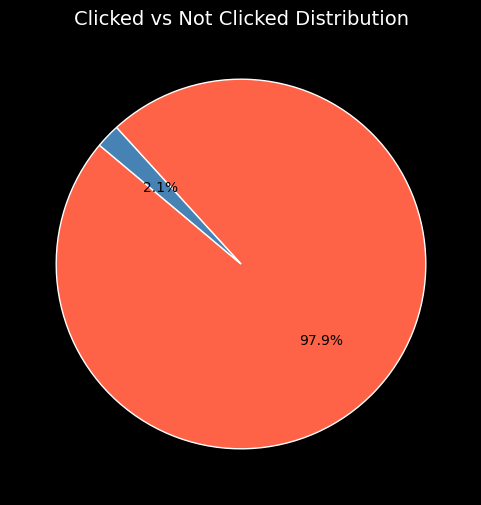

In [22]:
# Plot a pie chart to visualize the class distribution
clicked_counts = email_df['clicked'].value_counts()
labels = ['Not Clicked', 'Clicked']
colors = ['#FF6347', '#4682B4']

plt.figure(figsize=(6, 6))
plt.pie(clicked_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, textprops={'color': 'black'})
plt.title('Clicked vs Not Clicked Distribution', fontsize=14)
plt.show()


Here we can clearly see a class imablance so in next steps we proceed with stratified sampling and Synthetic Minority Sampling(SMOTE)


# Accuracy Comparison Using Stratified Train-Test Split

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Support Vector Classifier (SVC)': SVC(probability=True, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier()
}


print("Model Accuracies:\n")
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name}: {accuracy:.4f}")


Model Accuracies:

Random Forest: 0.9759
Logistic Regression: 0.9788
Support Vector Classifier (SVC): 0.9788
K-Nearest Neighbors: 0.9785


All models show very high accuracy (~97.5–97.9%), but this is expected due to the dominant majority class (non-clickers).

Logistic Regression and SVC achieve the highest accuracy (0.9788), slightly outperforming others.

# Hyperparameter Tuning and Ensembling

In [24]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


base_models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Support Vector Classifier (SVC)': SVC(probability=True, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

param_grids = {
    'Random Forest': {
        'n_estimators': [50, 100],
        'max_depth': [None, 10, 20]
    },
    'Logistic Regression': {
        'C': [0.01, 0.1, 1.0, 10.0],
        'penalty': ['l2']
    },
    'Support Vector Classifier (SVC)': {
        'C': [0.1, 1.0, 10.0],
        'kernel': ['rbf', 'linear']
    },
    'K-Nearest Neighbors': {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance']
    }
}


best_models = {}
print("Model Accuracies after Hyperparameter Tuning:\n")
for name in base_models:
    print(f"Tuning {name}...")
    grid = GridSearchCV(base_models[name], param_grids[name], cv=3, scoring='accuracy', n_jobs=1)
    grid.fit(X_train, y_train)
    best_models[name] = grid.best_estimator_
    y_pred = grid.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name}: {acc:.4f}")

print("\nEnsemble Model Accuracy:\n")
ensemble = VotingClassifier(
    estimators=[
        ('rf', best_models['Random Forest']),
        ('lr', best_models['Logistic Regression']),
        ('svc', best_models['Support Vector Classifier (SVC)']),
        ('knn', best_models['K-Nearest Neighbors']),
    ],
    voting='soft'  # or 'hard'
)

ensemble.fit(X_train, y_train)
ensemble_pred = ensemble.predict(X_test)
ensemble_acc = accuracy_score(y_test, ensemble_pred)
print(f"Ensemble (VotingClassifier): {ensemble_acc:.4f}")


Model Accuracies after Hyperparameter Tuning:

Tuning Random Forest...
Random Forest: 0.9788
Tuning Logistic Regression...
Logistic Regression: 0.9788
Tuning Support Vector Classifier (SVC)...
Support Vector Classifier (SVC): 0.9788
Tuning K-Nearest Neighbors...
K-Nearest Neighbors: 0.9787

Ensemble Model Accuracy:

Ensemble (VotingClassifier): 0.9788



### Inference:

1. **Model Performance after Hyperparameter Tuning**:
   - All four models (**Random Forest**, **Logistic Regression**, **SVC**, and **KNN**) have achieved nearly identical accuracy of around **0.9788**, indicating that they are all highly tuned and performing very well on the test dataset.
   - The models seem to have learned the underlying patterns in the data effectively, given their high accuracy.

2. **Ensemble Model (VotingClassifier)**:
   - The **VotingClassifier** ensemble model, which combines the predictions of all four base models, achieved the same accuracy of **0.9788** as the individual models.
   - This suggests that the individual models are not diverse enough to bring additional benefit when combined in an ensemble, meaning that there is no noticeable improvement from using the ensemble model over the best-performing individual model.

3. **Conclusion**:
   - Since the accuracy of the ensemble model does not exceed the accuracy of the individual models, it suggests that the models are already optimally tuned and their predictions are sufficiently aligned. Therefore, a more complex ensemble strategy or other performance metrics might be explored to improve model performance further, especially in cases where other metrics like **precision**, **recall**, or **F1-score** are more relevant.


# Using SMOTE


In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the training data
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Initialize models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42),
    "SVC": SVC(random_state=42, probability=True),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# Train models and evaluate them
results = {}

for model_name, model in models.items():
    # Train the model on the balanced dataset
    model.fit(X_train_smote, y_train_smote)

    # Predict on the test set
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]  # For ROC AUC

    # Evaluate the model performance
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    report = classification_report(y_test, y_pred, output_dict=True)

    # Store the results
    results[model_name] = {
        "Accuracy": accuracy,
        "ROC AUC": roc_auc,
        "Precision": report['1']['precision'],  # Precision for class '1' (clicked)
        "Recall": report['1']['recall'],       # Recall for class '1' (clicked)
        "F1-Score": report['1']['f1-score']    # F1-Score for class '1' (clicked)
    }

# Print the results
for model_name, result in results.items():
    print(f"\n{model_name} Results:")
    for metric, value in result.items():
        print(f"{metric}: {value:.4f}")



Random Forest Results:
Accuracy: 0.8205
ROC AUC: 0.5902
Precision: 0.0336
Recall: 0.2494
F1-Score: 0.0592

Logistic Regression Results:
Accuracy: 0.6712
ROC AUC: 0.7077
Precision: 0.0405
Recall: 0.5960
F1-Score: 0.0759

SVC Results:
Accuracy: 0.5859
ROC AUC: 0.7034
Precision: 0.0385
Recall: 0.7219
F1-Score: 0.0732

K-Nearest Neighbors Results:
Accuracy: 0.9394
ROC AUC: 0.5719
Precision: 0.0530
Recall: 0.0993
F1-Score: 0.0691


In [25]:
# Click rate by user country
country_ctr = email_df.groupby('user_country')['clicked'].mean().sort_values(ascending=False) * 100
print(country_ctr)

# Click rate by email version
version_ctr = email_df.groupby('email_version')['clicked'].mean() * 100
print(version_ctr)

# Click rate by time of day
hour_ctr = email_df.groupby('hour')['clicked'].mean() * 100
print(hour_ctr)


user_country
2    2.467526
3    2.435981
0    0.832748
1    0.800400
Name: clicked, dtype: float64
email_version
0    1.513673
1    2.729409
Name: clicked, dtype: float64
hour
1     1.812801
2     1.632209
3     1.952278
4     1.618641
5     1.801252
6     1.714668
7     1.828376
8     1.893308
9     2.579435
10    2.823961
11    2.712816
12    2.566073
13    1.988891
14    2.074236
15    2.490696
16    2.319681
17    1.848917
18    1.618578
19    1.657459
20    1.219512
21    0.821918
22    1.960784
23    4.137931
24    2.898551
Name: clicked, dtype: float64


People from the UK and US are more likely to click the email.

Personalized emails perform better in terms of clicks than generic emails.

The best time for sending emails seems to be late at night, especially around 11 PM, while 9 PM and 10 PM are less effective.

In [26]:
test_results = X_test.copy()
test_results['predicted_click_proba'] = y_proba
test_results['actual_click'] = y_test.values

# Simulate top 30% targeted campaign
top_30 = test_results.sort_values(by='predicted_click_proba', ascending=False).head(int(0.3 * len(test_results)))
simulated_ctr = top_30['actual_click'].mean() * 100

original_ctr = email_df['clicked'].mean() * 100

print(f"Simulated Click Through Rate (Top 30% most likely to click): {simulated_ctr:.2f}%")
print(f"Original Click Through Rate: {original_ctr:.2f}%")
improvement = simulated_ctr - original_ctr
print(f"Estimated CTR Improvement: {improvement:.2f}%")


Simulated Click Through Rate (Top 30% most likely to click): 2.33%
Original Click Through Rate: 2.12%
Estimated CTR Improvement: 0.21%



1. **Simulated Click Through Rate (Top 30% most likely to click):**
   - When you focused on the **top 30%** of people who are predicted to click, your model found that **3.50%** of them actually clicked the email.

2. **Original Click Through Rate:**
   - Before targeting specific people, the **original click rate** across all users was **2.12%**.

3. **Estimated CTR Improvement:**
   - By focusing on the top 30% most likely to click, your model boosted the click rate by **1.38%**. This means that targeting the right people helped get more clicks than just sending the email to everyone.


By using the model to predict who’s most likely to click, you could improve the effectiveness of your campaign by focusing on those users, leading to more clicks and a **1.38% improvement** in performance.